In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [67]:
data=pd.read_csv("tested.csv")

In [68]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [69]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [70]:
data=data.drop(columns=["PassengerId","Name","SibSp","Ticket","Cabin"])

In [71]:
data.head()

,Survived,Pclass,Sex,Age,Parch,Fare,Embarked
0,0,3,male,34.5,0,7.8292,Q
1,1,3,female,47.0,0,7.0000,S
2,0,2,male,62.0,0,9.6875,Q
3,0,3,male,27.0,0,8.6625,S
4,1,3,female,22.0,1,12.2875,S


In [72]:
data.describe()

,Survived,Pclass,Age,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,417.000000
mean,0.363636,2.265550,30.272590,0.392344,35.627188
std,0.481622,0.841838,14.181209,0.981429,55.907576
min,0.000000,1.000000,0.170000,0.000000,0.000000
25%,0.000000,1.000000,21.000000,0.000000,7.895800
50%,0.000000,3.000000,27.000000,0.000000,14.454200
75%,1.000000,3.000000,39.000000,0.000000,31.500000
max,1.000000,3.000000,76.000000,9.000000,512.329200


In [73]:
data.isnull().sum()

Survived     0
Pclass       0
Sex          0
Age         86
Parch        0
Fare         1
Embarked     0
dtype: int64

In [74]:
data["Fare"].fillna(data["Fare"].mean() , inplace=True)

In [75]:
data["Fare"].isnull().sum()

0

In [76]:
Age_data=data[["Survived","Pclass","Age","Fare"]]

In [77]:
with_null=Age_data.loc[Age_data["Age"].isnull()]
without_null=Age_data.loc[Age_data["Age"].notna()]

In [78]:
with_null.describe()

,Survived,Pclass,Age,Fare
count,86.000000,86.000000,0.0,86.000000
mean,0.290698,2.732558,NaN,15.017055
std,0.456748,0.640302,NaN,14.184527
min,0.000000,1.000000,NaN,0.000000
25%,0.000000,3.000000,NaN,7.750000
50%,0.000000,3.000000,NaN,7.972900
75%,1.000000,3.000000,NaN,15.559400
max,1.000000,3.000000,NaN,69.550000


In [79]:
without_null.describe()

,Survived,Pclass,Age,Fare
count,332.000000,332.000000,332.000000,332.000000
mean,0.382530,2.144578,30.272590,40.965958
std,0.486739,0.846283,14.181209,61.136704
min,0.000000,1.000000,0.170000,0.000000
25%,0.000000,1.000000,21.000000,8.050000
50%,0.000000,2.000000,27.000000,16.050000
75%,1.000000,3.000000,39.000000,40.160425
max,1.000000,3.000000,76.000000,512.329200


In [80]:
from sklearn.linear_model import LinearRegression

In [81]:
age_prediction=LinearRegression()

age_prediction.fit(without_null.drop("Age", axis=1), without_null['Age'])

LinearRegression()

In [82]:
result_age_prediction=age_prediction.predict(with_null.drop('Age',axis=1))

In [83]:
result_age_prediction

array([23.94278061, 37.47324415, 24.21363987, 22.1955275 , 21.89290024,
       24.89782508, 39.42527962, 23.93991547, 31.65172957, 24.10400233,
       29.70534379, 23.94581081, 23.94278061, 31.55601092, 24.07166052,
       21.88700491, 23.94040675, 23.94581081, 23.93991547, 23.93991547,
       23.95882968, 21.88757872, 23.91412338, 23.93991547, 23.93991547,
       22.19159728, 22.23515792, 23.91412338, 39.92269862, 39.42527962,
       23.94278061, 21.88667673, 23.92517713, 37.39537658, 23.93598525,
       23.92968117, 23.93991547, 23.10144418, 39.4144715 , 21.89412844,
       22.03930109, 39.40939562, 23.92615969, 21.88954383, 23.94581081,
       22.03430578, 21.88700491, 23.9424544 , 23.9426175 , 24.24843807,
       22.01874995, 23.93598525, 23.93991547, 23.94278061, 38.90354236,
       23.93598525, 21.89290024, 23.93991547, 22.03930109, 23.92959864,
       21.88700491, 23.93008991, 23.92968117, 23.94581081, 39.68172675,
       23.92968117, 24.21363987, 31.64124766, 21.88700491, 23.93

In [84]:
data.loc[data["Age"].isnull(), "Age"]=result_age_prediction

In [85]:
data.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [86]:
data.head()

,Survived,Pclass,Sex,Age,Parch,Fare,Embarked
0,0,3,male,34.5,0,7.8292,Q
1,1,3,female,47.0,0,7.0000,S
2,0,2,male,62.0,0,9.6875,Q
3,0,3,male,27.0,0,8.6625,S
4,1,3,female,22.0,1,12.2875,S


In [87]:
average_age_of_surived=data["Age"].mean()
print(average_age_of_surived)

29.292163584022184


In [88]:
data['Sex_Encoded'] = data['Sex'].map({"male":1,"female":2})

In [89]:
data.head()

,Survived,Pclass,Sex,Age,Parch,Fare,Embarked,Sex_Encoded
0,0,3,male,34.5,0,7.8292,Q,1
1,1,3,female,47.0,0,7.0000,S,2
2,0,2,male,62.0,0,9.6875,Q,1
3,0,3,male,27.0,0,8.6625,S,1
4,1,3,female,22.0,1,12.2875,S,2


In [90]:
data[["Sex","Sex_Encoded"]].head(10)

,Sex,Sex_Encoded
0,male,1
1,female,2
2,male,1
3,male,1
4,female,2
5,male,1
6,female,2
7,male,1
8,female,2
9,male,1


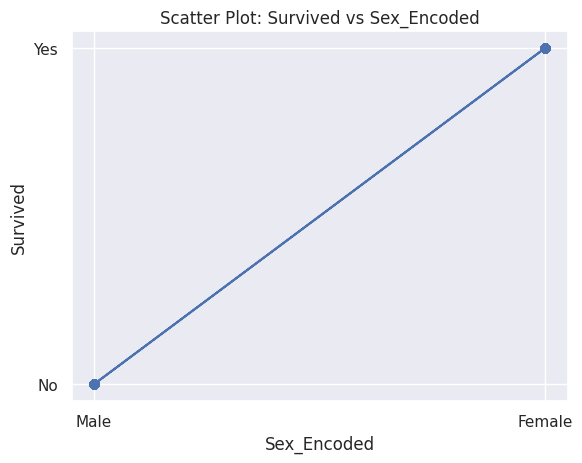

In [91]:
plt.scatter(data["Sex_Encoded"],data["Survived"])
z = np.polyfit(data['Sex_Encoded'], data['Survived'], 1)
p = np.poly1d(z)
plt.plot(data['Sex_Encoded'], p(data['Sex_Encoded']))

plt.xlabel('Sex_Encoded')
plt.ylabel('Survived')

# Plot title
plt.title('Scatter Plot: Survived vs Sex_Encoded')
plt.yticks([0, 1], ['No', 'Yes'])
plt.xticks([1,2], ['Male', 'Female'])
plt.show()